In [48]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# View the first few rows of the dataset
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Task 1: Dataset Overview**

Each row is an individual that was on the titanic, and there are coloums to describe the indvidual. There are 15 coloums. The diffrent coloums repersent survival, class, sex, age and many other information. This dataset is great to gather an understanding of the social and economical status of each passanger.

**Task 2: Fare Distribution**

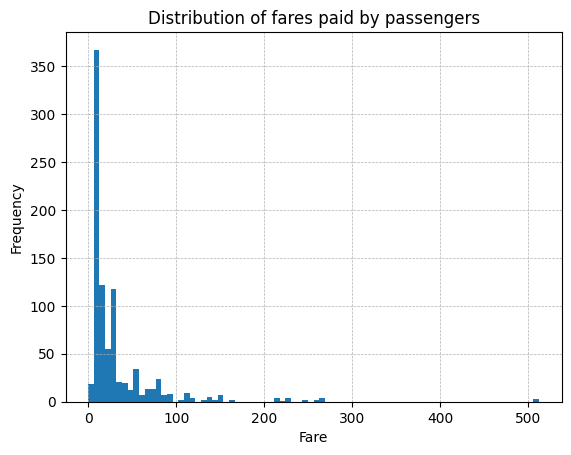

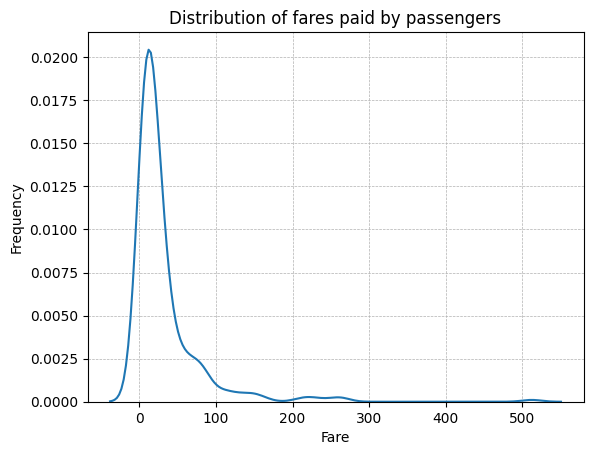

In [49]:
plt.hist(titanic['fare'],bins=80)
plt.title('Distribution of fares paid by passengers')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


sns.kdeplot(titanic['fare'])
plt.title('Distribution of fares paid by passengers')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
plt.show()

The trends I observed that passengers paid low fares because the graph is right-skewed. The outliers are the passangers who paid higher fares. The fare might affect the survival rates because those in who paid higher fares most likely had easier access to lifeboats.

**Task 3: Fare and Survival Rates**

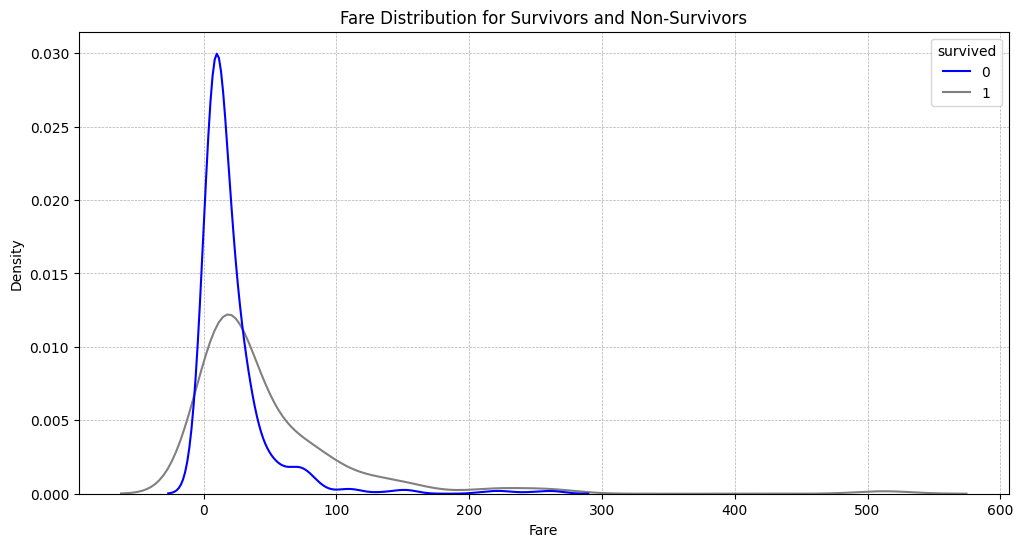

In [50]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=titanic, x='fare', hue='survived', common_norm=False, palette=['blue', 'grey'])
plt.title('Fare Distribution for Survivors and Non-Survivors')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

It doens't seem like fare had an influence on the survival rate. There was still a good amount of survivors form the low fare.

With socioeconomic satus, those who paid higher fares most likely had better chance at reciving life boats and safer exits but the distribution suggests that both low fare and high fare had survivers regardless of social status.

**Task 4: Passenger Class, Fare, and Survival**

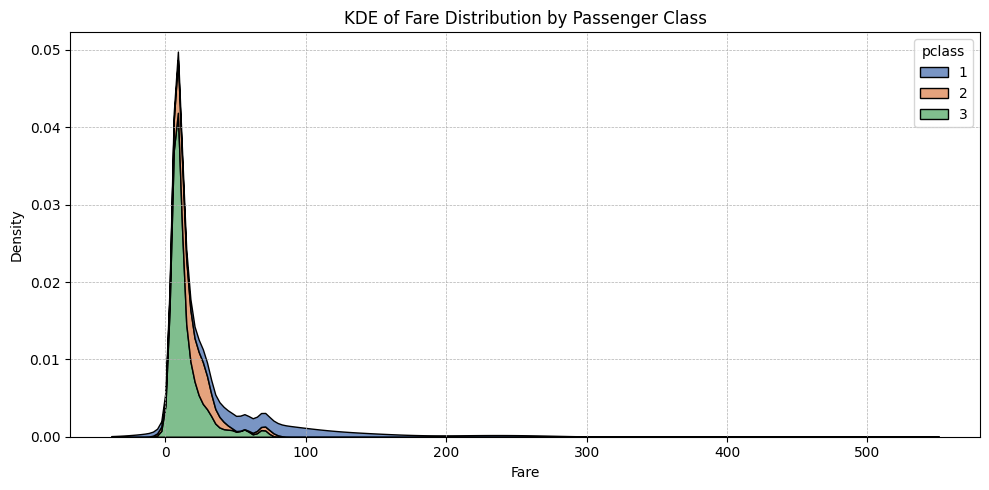

<ipython-input-51-1bca238ab5ec>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pclass', y='survived', data=titanic, palette='pastel')


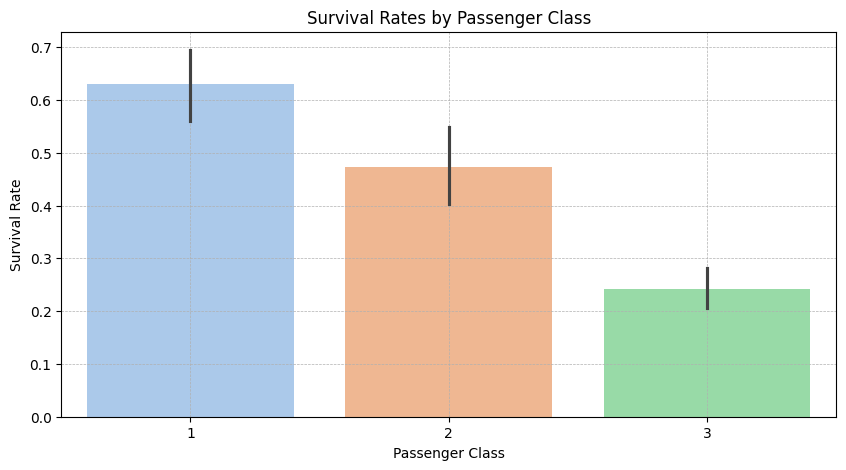

In [51]:
plt.figure(figsize=(10, 5))

sns.kdeplot(data=titanic, x='fare', hue='pclass', multiple='stack', palette='deep')
plt.title('KDE of Fare Distribution by Passenger Class')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='pclass', y='survived', data=titanic, palette='pastel')
plt.title('Survival Rates by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

This graph does a better job clearly visualizing the difffrent classes and the survival rate. There is higher survival with the high class compared to the low class. Those who paid low fair seem to have less survival rate compared to how many passangers orignally purchsed a lower fare. Although those who paid higher fares (high class) were a limited amount of people, they still have the highest survival rate. This could be because they had a better first class acess to safer exits and life boats.

**Task 5: Age of Survivors and Non-Survivors**

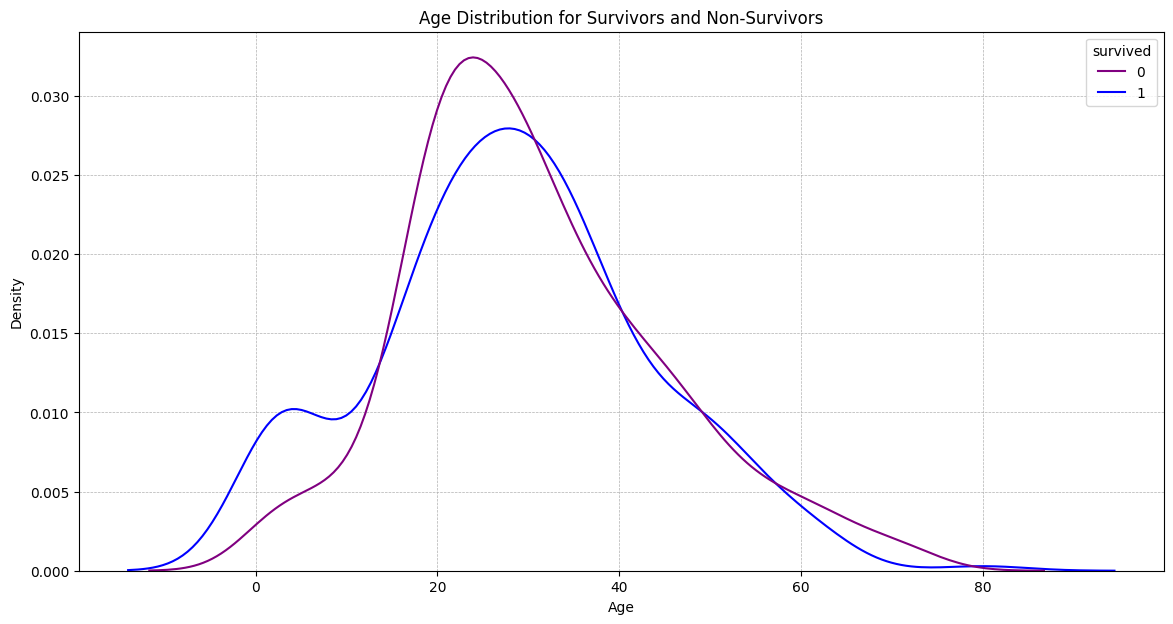

In [52]:
plt.figure(figsize=(14, 7))
sns.kdeplot(data=titanic, x='age', hue='survived', common_norm=False, palette=['purple', 'blue'])
plt.title('Age Distribution for Survivors and Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


Young children and those in thier 20s-30s seem to have the highest survival rate. There is a peak of high survival from 20-30. Age could've impacted suvival rate because those who are young are more active and able to get to exits quicker and make it on a lifeboat. Childern can have priority on the lifeboats as well.

**Task 6: Pyramid Histogram for Age Survival by Sex**

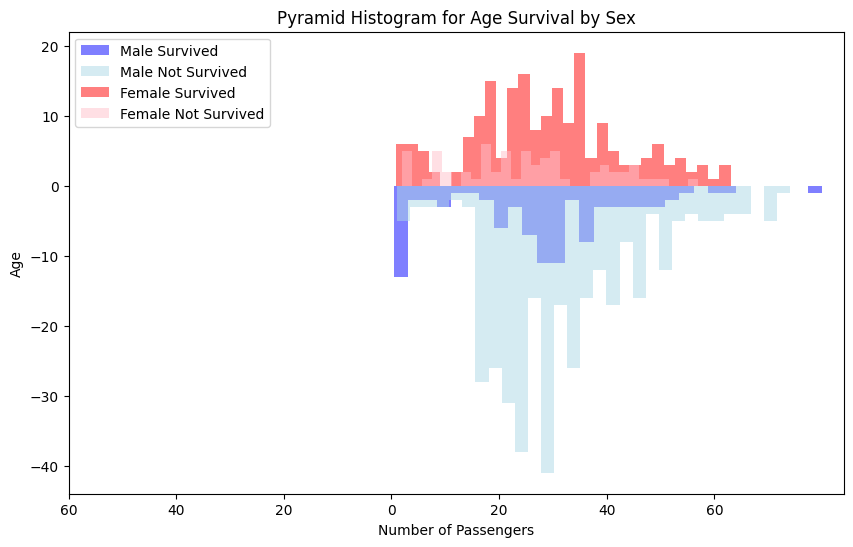

In [53]:
ages_male_survived = titanic[(titanic['sex'] == 'male') & (titanic['survived'] == 1)]['age'].dropna()
ages_male_not_survived = titanic[(titanic['sex'] == 'male') & (titanic['survived'] == 0)]['age'].dropna()
ages_female_survived = titanic[(titanic['sex'] == 'female') & (titanic['survived'] == 1)]['age'].dropna()
ages_female_not_survived = titanic[(titanic['sex'] == 'female') & (titanic['survived'] == 0)]['age'].dropna()


plt.figure(figsize=(10, 6))
plt.hist(ages_male_survived, bins=30, label='Male Survived', alpha=0.5, color='blue', weights=[-1] * len(ages_male_survived))
plt.hist(ages_male_not_survived, bins=30, label='Male Not Survived', alpha=0.5, color='lightblue', weights=[-1] * len(ages_male_not_survived))
plt.hist(ages_female_survived, bins=30, label='Female Survived', alpha=0.5, color='red')
plt.hist(ages_female_not_survived, bins=30, label='Female Not Survived', alpha=0.5, color='pink')

plt.xlabel('Number of Passengers')
plt.ylabel('Age')
plt.title('Pyramid Histogram for Age Survival by Sex')

plt.xticks([-60, -40, -20, 0, 20, 40, 60], [60, 40, 20, 0, 20, 40, 60])
plt.legend(loc='upper left')
plt.show()


There is a big difference between the male and female survival. There were more female passangers that survived compared to the male. The younger male had higher survival than the older male passangers.

**Task 7 (Optional): Bar Graph, Line Plot, and Scatter Plot**

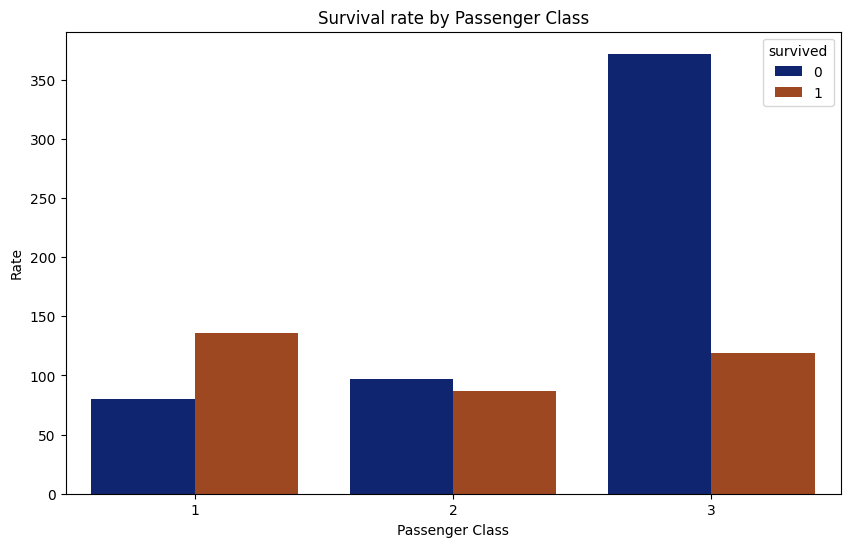

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic, x='pclass', hue='survived', palette='dark')
plt.title('Survival rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Rate')
plt.show()

The diffrent visualizations helps us understand the data better. Each graph allows us to look at the trends and how age, gender, fare and class can have affect on the survival rate.